In [ ]:
import pandas as pd

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/DATASETS/SENTIMENTAL-ANALYSIS/Restaurant_Reviews.tsv',sep='\t')
df

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
...,...,...
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  1000 non-null   object
 1   Liked   1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


In [ ]:
df.isnull().sum()

Review    0
Liked     0
dtype: int64

In [ ]:
s=df['Review']
s

0                               Wow... Loved this place.
1                                     Crust is not good.
2              Not tasty and the texture was just nasty.
3      Stopped by during the late May bank holiday of...
4      The selection on the menu was great and so wer...
                             ...                        
995    I think food should have flavor and texture an...
996                             Appetite instantly gone.
997    Overall I was not impressed and would not go b...
998    The whole experience was underwhelming, and I ...
999    Then, as if I hadn't wasted enough of my life ...
Name: Review, Length: 1000, dtype: object

In [ ]:
X=df['Liked'].value_counts()
X

1    500
0    500
Name: Liked, dtype: int64

In [ ]:
Y=[1,0]

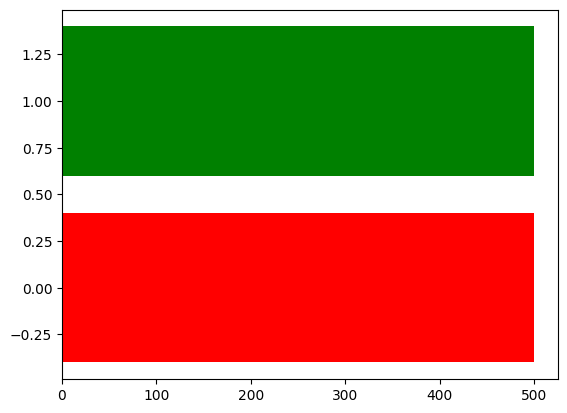

In [ ]:
import matplotlib.pyplot as plt
plt.barh(Y,X,color=['green','red'])
plt.show()

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vect=CountVectorizer(stop_words='english')
op=vect.fit_transform(s).toarray

In [ ]:
x=df['Review'].values
y=df['Liked'].values

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0)

In [ ]:
x_train_vect=vect.fit_transform(x_train)
x_test_vect=vect.transform(x_test)

In [ ]:
from sklearn.svm import SVC
model=SVC()
model.fit(x_train_vect,y_train)
y_pred=model.predict(x_test_vect)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred,y_test)

0.72

In [ ]:
test=vect.transform([df['Review'][995]])
model.predict(test)

array([0])

In [ ]:
#pipeline method
from sklearn.pipeline import make_pipeline
model1=make_pipeline(CountVectorizer(),SVC())
model1.fit(x_train,y_train)
y_pred1=model1.predict(x_test)
model1.predict([df['Review'][995]])

array([0])

In [ ]:
accuracy_score(y_pred1,y_test)

0.792

In [ ]:
# SVC and countvectorizer method - 72%
# pipeline method                - 79%
# pipeline method is the best method

In [ ]:
import joblib
joblib.dump(model1,'Sentiment Analysis')

['Sentiment Analysis']

In [ ]:
reload_model=joblib.load('Sentiment Analysis')
reload_model.predict(['worst'])

array([0])

In [ ]:
pip install streamlit --quiet

In [ ]:
%%writefile app.py
import streamlit as st
import joblib
reload_model=joblib.load('Sentiment Analysis')
st.title("SENTIMENT ANALYSIS")
ip=st.text_input("Enter your review")
op=reload_model.predict([ip])
if st.button('PREDICT'):
  if op[0]==0:
    st.title('Negative')
  else:
    st.title('Positive')
  

Overwriting app.py


In [ ]:
!streamlit run app.py &npx localtunnel --port 8501

[..................] / rollbackFailedOptional: verb npm-session ef102de09c13e7a


  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.12:8501
  External URL: http://34.91.161.139:8501

npx: installed 22 in 2.835s
your url is: https://slimy-buses-learn.loca.lt
/root/.npm/_npx/8387/lib/node_modules/localtunnel/bin/lt.js:81
    throw err;
    ^

Error: connection refused: localtunnel.me:41703 (check your firewall settings)
    at Socket.<anonymous> (/root/.npm/_npx/8387/lib/node_modules/localtunnel/lib/TunnelCluster.js:52:11)
    at Socket.emit (events.js:315:20)
    at emitErrorNT (internal/streams/destroy.js:106:8)
    at emitErrorCloseNT (internal/streams/destroy.js:74:3)
    at processTicksAndRejections (internal/process/task_queues.js:80:21)
